In [1]:
import sys
import os

# Get the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Add parent directory to sys.path
sys.path.append(parent_dir)

print(parent_dir)

/home/adam/dev/gradual-aacbr/examples


In [2]:
import numpy as np
from matplotlib import pyplot as plt

import deeparguing.aacbr as aacbr


from helper import load_glioma, split_data, normalise_input
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
SEED = 1

### DATA SET

In [4]:
X, y = load_glioma(exclude_non_binary_features=True)

y = np.argmax(y, axis=-1)
all_y = np.unique(y, axis=0)
print(all_y)

[0 1]


In [5]:
train_full, train, val, test = split_data(X, y, SEED)

print(f"Test Size:  {len(test['X'])}")
print(f"Train Size:  {len(train['X'])}")
print(f"Validation Size:  {len(val['X'])}")

Test Size:  168
Train Size:  536
Validation Size:  135


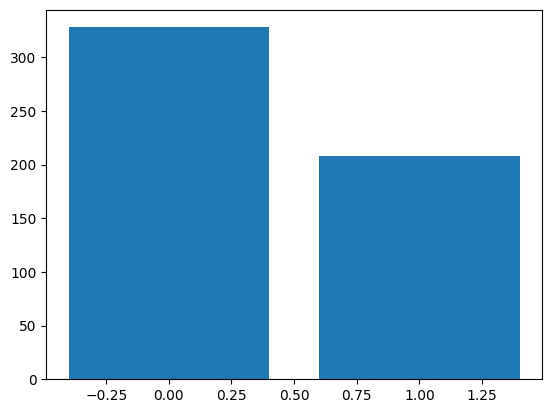

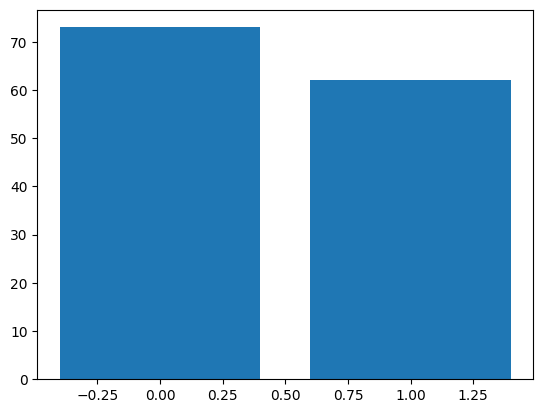

In [6]:
result = np.unique(train['y'], axis=0, return_counts=True)
plt.bar(x = result[0] , height = result[1])
plt.show()

result = np.unique(val['y'], axis=0, return_counts=True)
plt.bar(x = result[0] , height = result[1])
plt.show()

In [7]:
X_train_full, y_train_full = train_full["X"], train_full["y"] 
X_train, y_train           = train["X"]     , train["y"]      
X_val, y_val               = val["X"]       , val["y"]        
X_test, y_test             = test["X"]      , test["y"]       

### TRAIN MODEL

In [8]:
DEFAULT_CASE = np.zeros(X_train.shape[1])

In [9]:
def eval_model(model, X, y):
    # Assess the model pre-training
        y_preds = model(X)
        y_actual = y

        # print("predictions", y_preds)
        # print("actuals", y_actual)

        results = ( 
            accuracy_score(y_actual, y_preds),
            precision_score(y_actual, y_preds, average='macro', zero_division=0),
            recall_score(y_actual, y_preds, average='macro', zero_division=0),
            f1_score(y_actual, y_preds, average='macro', zero_division=0),
            confusion_matrix(y_actual, y_preds)
        )


        print("Accuracy, precision, recall, f1")
        print(results[:-1])
        print("confusion matrix:")
        print(results[-1])

In [10]:
def strict_subset(a, t):
    if a.ndim == 1:
        a = a[np.newaxis, :]
    if t.ndim == 1:
        t = t[np.newaxis, :]
    result = np.logical_and(np.all(a >= t, axis = -1), np.any(a != t, axis = -1))
    return result

In [11]:

model = aacbr.AACBR(X_train, y_train, strict_subset, DEFAULT_CASE, all_y[1:2], 
                    use_symmetric_attacks=False, build_parallel=False)

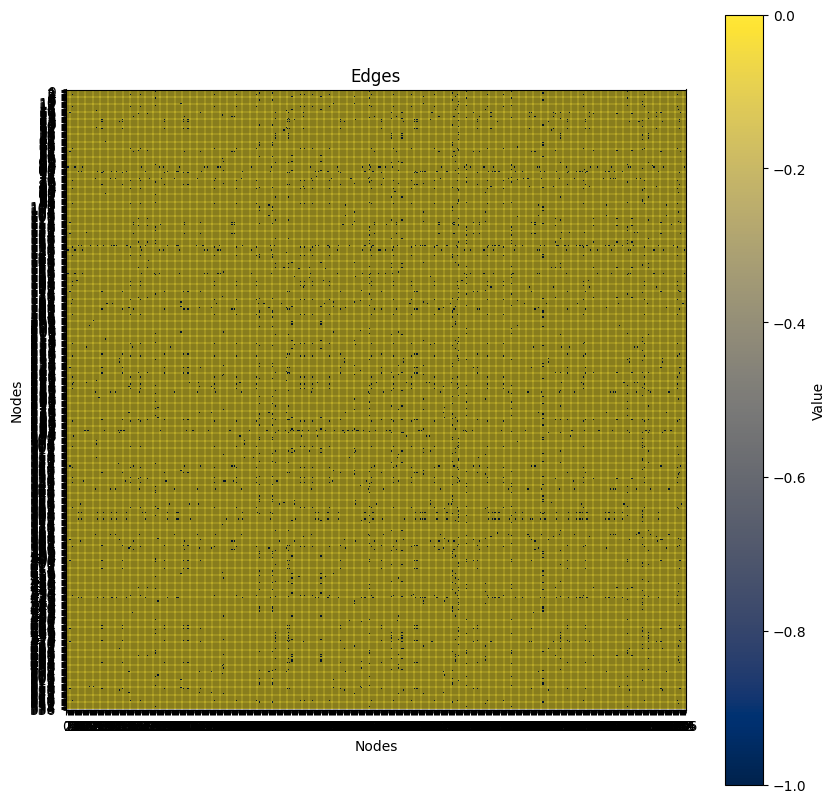

In [12]:
model.show_matrix()

/home/adam/.pyenv/versions/gradual-aacbr/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


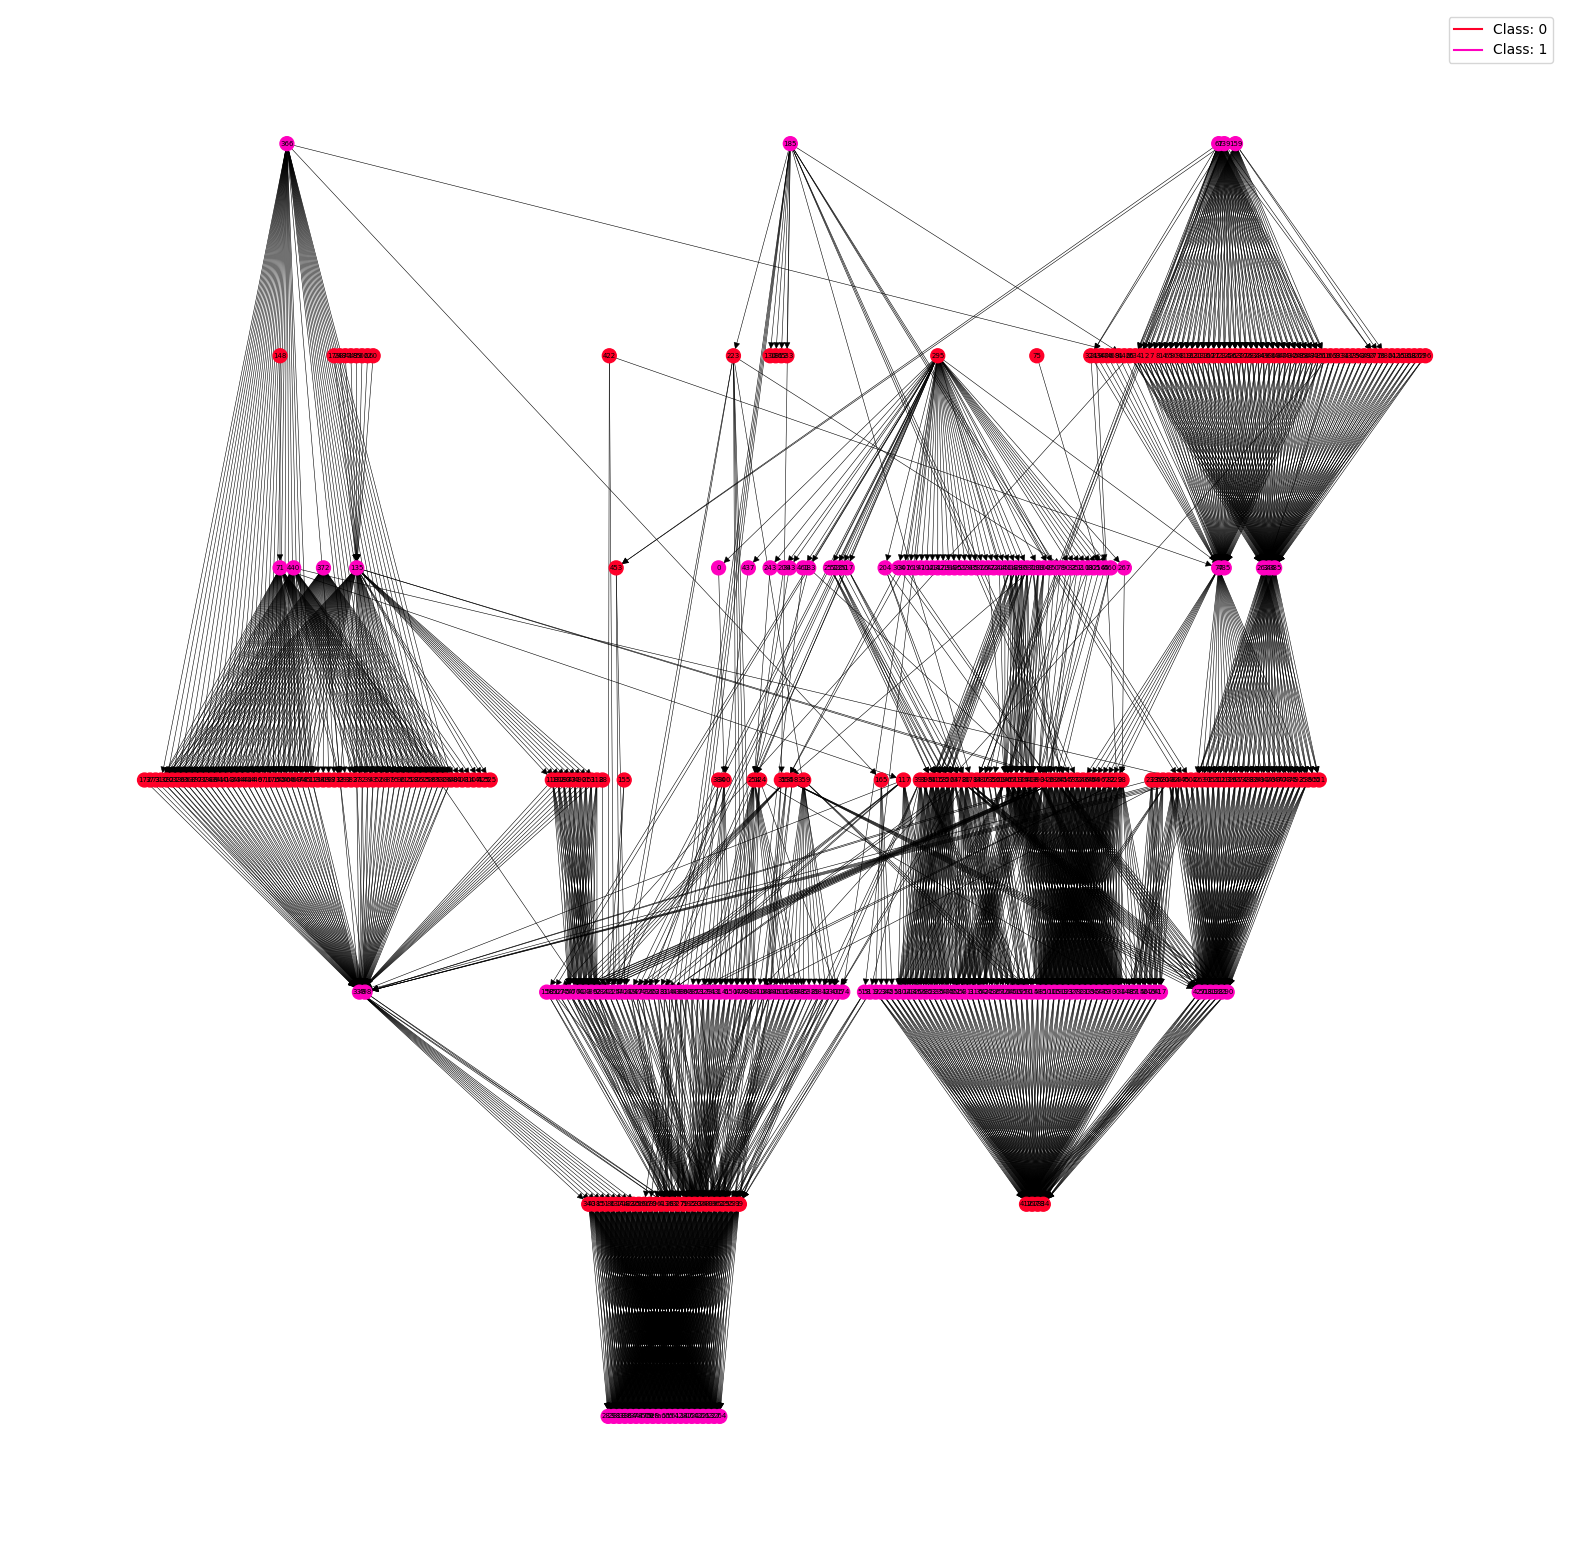

In [13]:
model.show_graph_with_labels()

In [14]:
eval_model(model, X_val, y_val)

Accuracy, precision, recall, f1
(0.6888888888888889, np.float64(0.6868095448519664), np.float64(0.6868095448519664), np.float64(0.6868095448519664))
confusion matrix:
[[52 21]
 [21 41]]


In [15]:
assert(False)

AssertionError: 

In [18]:
eval_model(model, X_test, y_test)

Accuracy, precision, recall, f1
(0.6726190476190477, np.float64(0.6724137931034482), np.float64(0.6722915484968803), np.float64(0.6723288059860278))
confusion matrix:
[[59 27]
 [28 54]]
